In [30]:
import pandas as pd 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression 
from sklearn import metrics
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sn
#importing the warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv('covid.csv')
print(df)

              Province_State Country_Region     Last_Update      Lat  \
0                    Alabama             US  05/21/20 02:32  32.3182   
1                     Alaska             US  05/21/20 02:32  61.3707   
2             American Samoa             US  05/21/20 02:32 -14.2710   
3                    Arizona             US  05/21/20 02:32  33.7298   
4                   Arkansas             US  05/21/20 02:32  34.9697   
5                 California             US  05/21/20 02:32  36.1162   
6                   Colorado             US  05/21/20 02:32  39.0598   
7                Connecticut             US  05/21/20 02:32  41.5978   
8                   Delaware             US  05/21/20 02:32  39.3185   
9           Diamond Princess             US  05/21/20 02:32      NaN   
10      District of Columbia             US  05/21/20 02:32  38.8974   
11                   Florida             US  05/21/20 02:32  27.7663   
12                   Georgia             US  05/21/20 02:32  33.

In [3]:
#Checking the columns
df.shape

(58, 18)

In [4]:
#checking the various columns
df.columns

Index(['Province_State', 'Country_Region', 'Last_Update', 'Lat', 'Long_',
       'Confirmed', 'Deaths', 'Recovered', 'Active', 'FIPS', 'Incident_Rate',
       'People_Tested', 'People_Hospitalized', 'Mortality_Rate', 'UID', 'ISO3',
       'Testing_Rate', 'Hospitalization_Rate'],
      dtype='object')

In [5]:
#checking the data types of the columns
df.dtypes

Province_State           object
Country_Region           object
Last_Update              object
Lat                     float64
Long_                   float64
Confirmed                 int64
Deaths                    int64
Recovered               float64
Active                    int64
FIPS                      int64
Incident_Rate           float64
People_Tested           float64
People_Hospitalized     float64
Mortality_Rate          float64
UID                       int64
ISO3                     object
Testing_Rate            float64
Hospitalization_Rate    float64
dtype: object

In [6]:
#Cheking the information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58 entries, 0 to 57
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Province_State        58 non-null     object 
 1   Country_Region        58 non-null     object 
 2   Last_Update           58 non-null     object 
 3   Lat                   56 non-null     float64
 4   Long_                 56 non-null     float64
 5   Confirmed             58 non-null     int64  
 6   Deaths                58 non-null     int64  
 7   Recovered             42 non-null     float64
 8   Active                58 non-null     int64  
 9   FIPS                  58 non-null     int64  
 10  Incident_Rate         56 non-null     float64
 11  People_Tested         56 non-null     float64
 12  People_Hospitalized   33 non-null     float64
 13  Mortality_Rate        57 non-null     float64
 14  UID                   58 non-null     int64  
 15  ISO3                  58 

In [7]:
df.describe()

,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,Testing_Rate,Hospitalization_Rate
count,56.000000,56.000000,58.000000,58.000000,42.000000,58.000000,58.000000,56.000000,5.600000e+01,33.000000,57.000000,5.800000e+01,56.000000,33.000000
mean,36.840089,-85.206614,26756.086207,1611.017241,7007.428571,20070.724138,3288.086207,396.230806,2.258534e+05,4897.454545,4.458248,7.676194e+07,3894.186870,14.342541
std,10.887035,49.754449,52562.031122,4084.750891,11674.490020,41294.705318,17408.350591,402.682539,2.987834e+05,13185.628145,2.135002,2.378302e+07,1933.169297,5.047403
min,-14.271000,-170.132000,0.000000,0.000000,13.000000,0.000000,1.000000,0.000000,1.240000e+02,65.000000,0.000000,1.600000e+01,97.702058,6.778043
25%,34.594600,-101.165775,2596.000000,74.000000,970.000000,812.500000,18.250000,148.521021,4.608100e+04,535.000000,3.072626,8.400001e+07,2712.800275,10.000000
50%,39.061850,-87.944200,10148.500000,385.000000,3008.000000,5644.500000,32.500000,250.477287,1.386545e+05,1493.000000,4.403318,8.400003e+07,3469.782532,13.598326
75%,42.361650,-76.970625,29395.500000,1394.250000,7326.750000,19291.250000,47.750000,477.888542,2.796948e+05,4389.000000,5.466238,8.400004e+07,4763.649736,17.658649
max,61.370700,145.673900,354370.000000,28636.000000,61886.000000,263848.000000,99999.000000,1821.620216,1.505836e+06,76410.000000,9.545549,8.410000e+07,11377.424690,28.054438


In [8]:
df.isnull().values.any()

True

In [9]:
#Checking for null values
df.isnull().sum()

Province_State           0
Country_Region           0
Last_Update              0
Lat                      2
Long_                    2
Confirmed                0
Deaths                   0
Recovered               16
Active                   0
FIPS                     0
Incident_Rate            2
People_Tested            2
People_Hospitalized     25
Mortality_Rate           1
UID                      0
ISO3                     0
Testing_Rate             2
Hospitalization_Rate    25
dtype: int64

In [10]:
for col in['Lat','Long_','Recovered','Incident_Rate','People_Tested','People_Hospitalized','Mortality_Rate','Testing_Rate','Hospitalization_Rate']:df[col].fillna(df[col].mode()[0],inplace=True)

In [11]:
df.isnull().values.any()

False

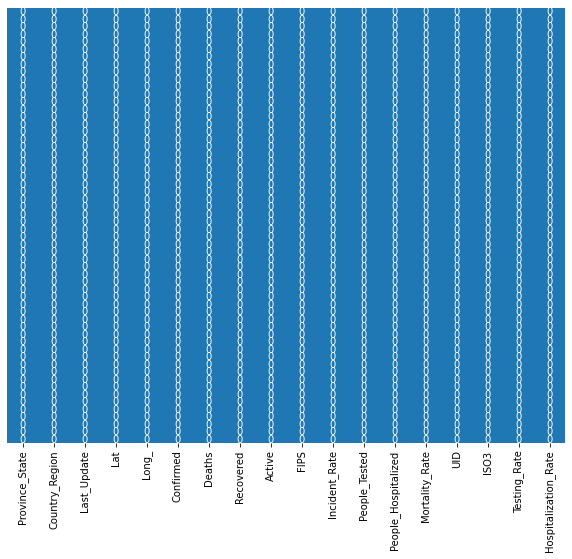

In [12]:
#Seeing the null value with the help of heatmap
plt.figure(figsize=(10,8))
sn.heatmap(df.isnull(),yticklabels=False, cbar=False,cmap='tab10',annot=True)
plt.show()

In [13]:
#To check the correlation
df=df.corr()
df

,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,Testing_Rate,Hospitalization_Rate
Lat,1.000000,0.002196,0.154305,0.139476,0.126235,0.150797,-0.659609,0.301176,0.155596,0.093443,0.197941,0.541403,0.446237,0.185604
Long_,0.002196,1.000000,0.038955,0.050209,0.021524,0.039173,-0.303707,0.093936,-0.030655,0.048236,0.409142,-0.518902,0.275208,-0.027795
Confirmed,0.154305,0.038955,1.000000,0.982191,0.757002,0.985218,-0.096696,0.714239,0.829563,0.847085,0.386823,0.153972,0.345426,0.211278
Deaths,0.139476,0.050209,0.982191,1.000000,0.782442,0.954378,-0.075053,0.711955,0.742861,0.889134,0.425715,0.120043,0.349213,0.231250
Recovered,0.126235,0.021524,0.757002,0.782442,1.000000,0.634473,-0.092738,0.527111,0.602189,0.689726,0.312425,0.149989,0.284504,0.122745
Active,0.150797,0.039173,0.985218,0.954378,0.634473,1.000000,-0.092276,0.706045,0.830928,0.816697,0.371632,0.146354,0.333500,0.215144
FIPS,-0.659609,-0.303707,-0.096696,-0.075053,-0.092738,-0.092276,1.000000,-0.181226,-0.140120,-0.051493,-0.246082,0.058022,-0.344818,-0.153447
Incident_Rate,0.301176,0.093936,0.714239,0.711955,0.527111,0.706045,-0.181226,1.000000,0.455475,0.535094,0.416559,0.249272,0.635401,0.162099
People_Tested,0.155596,-0.030655,0.829563,0.742861,0.602189,0.830928,-0.140120,0.455475,1.000000,0.612123,0.272857,0.225071,0.262823,0.160719
People_Hospitalized,0.093443,0.048236,0.847085,0.889134,0.689726,0.816697,-0.051493,0.535094,0.612123,1.000000,0.287016,0.083721,0.281643,0.427241


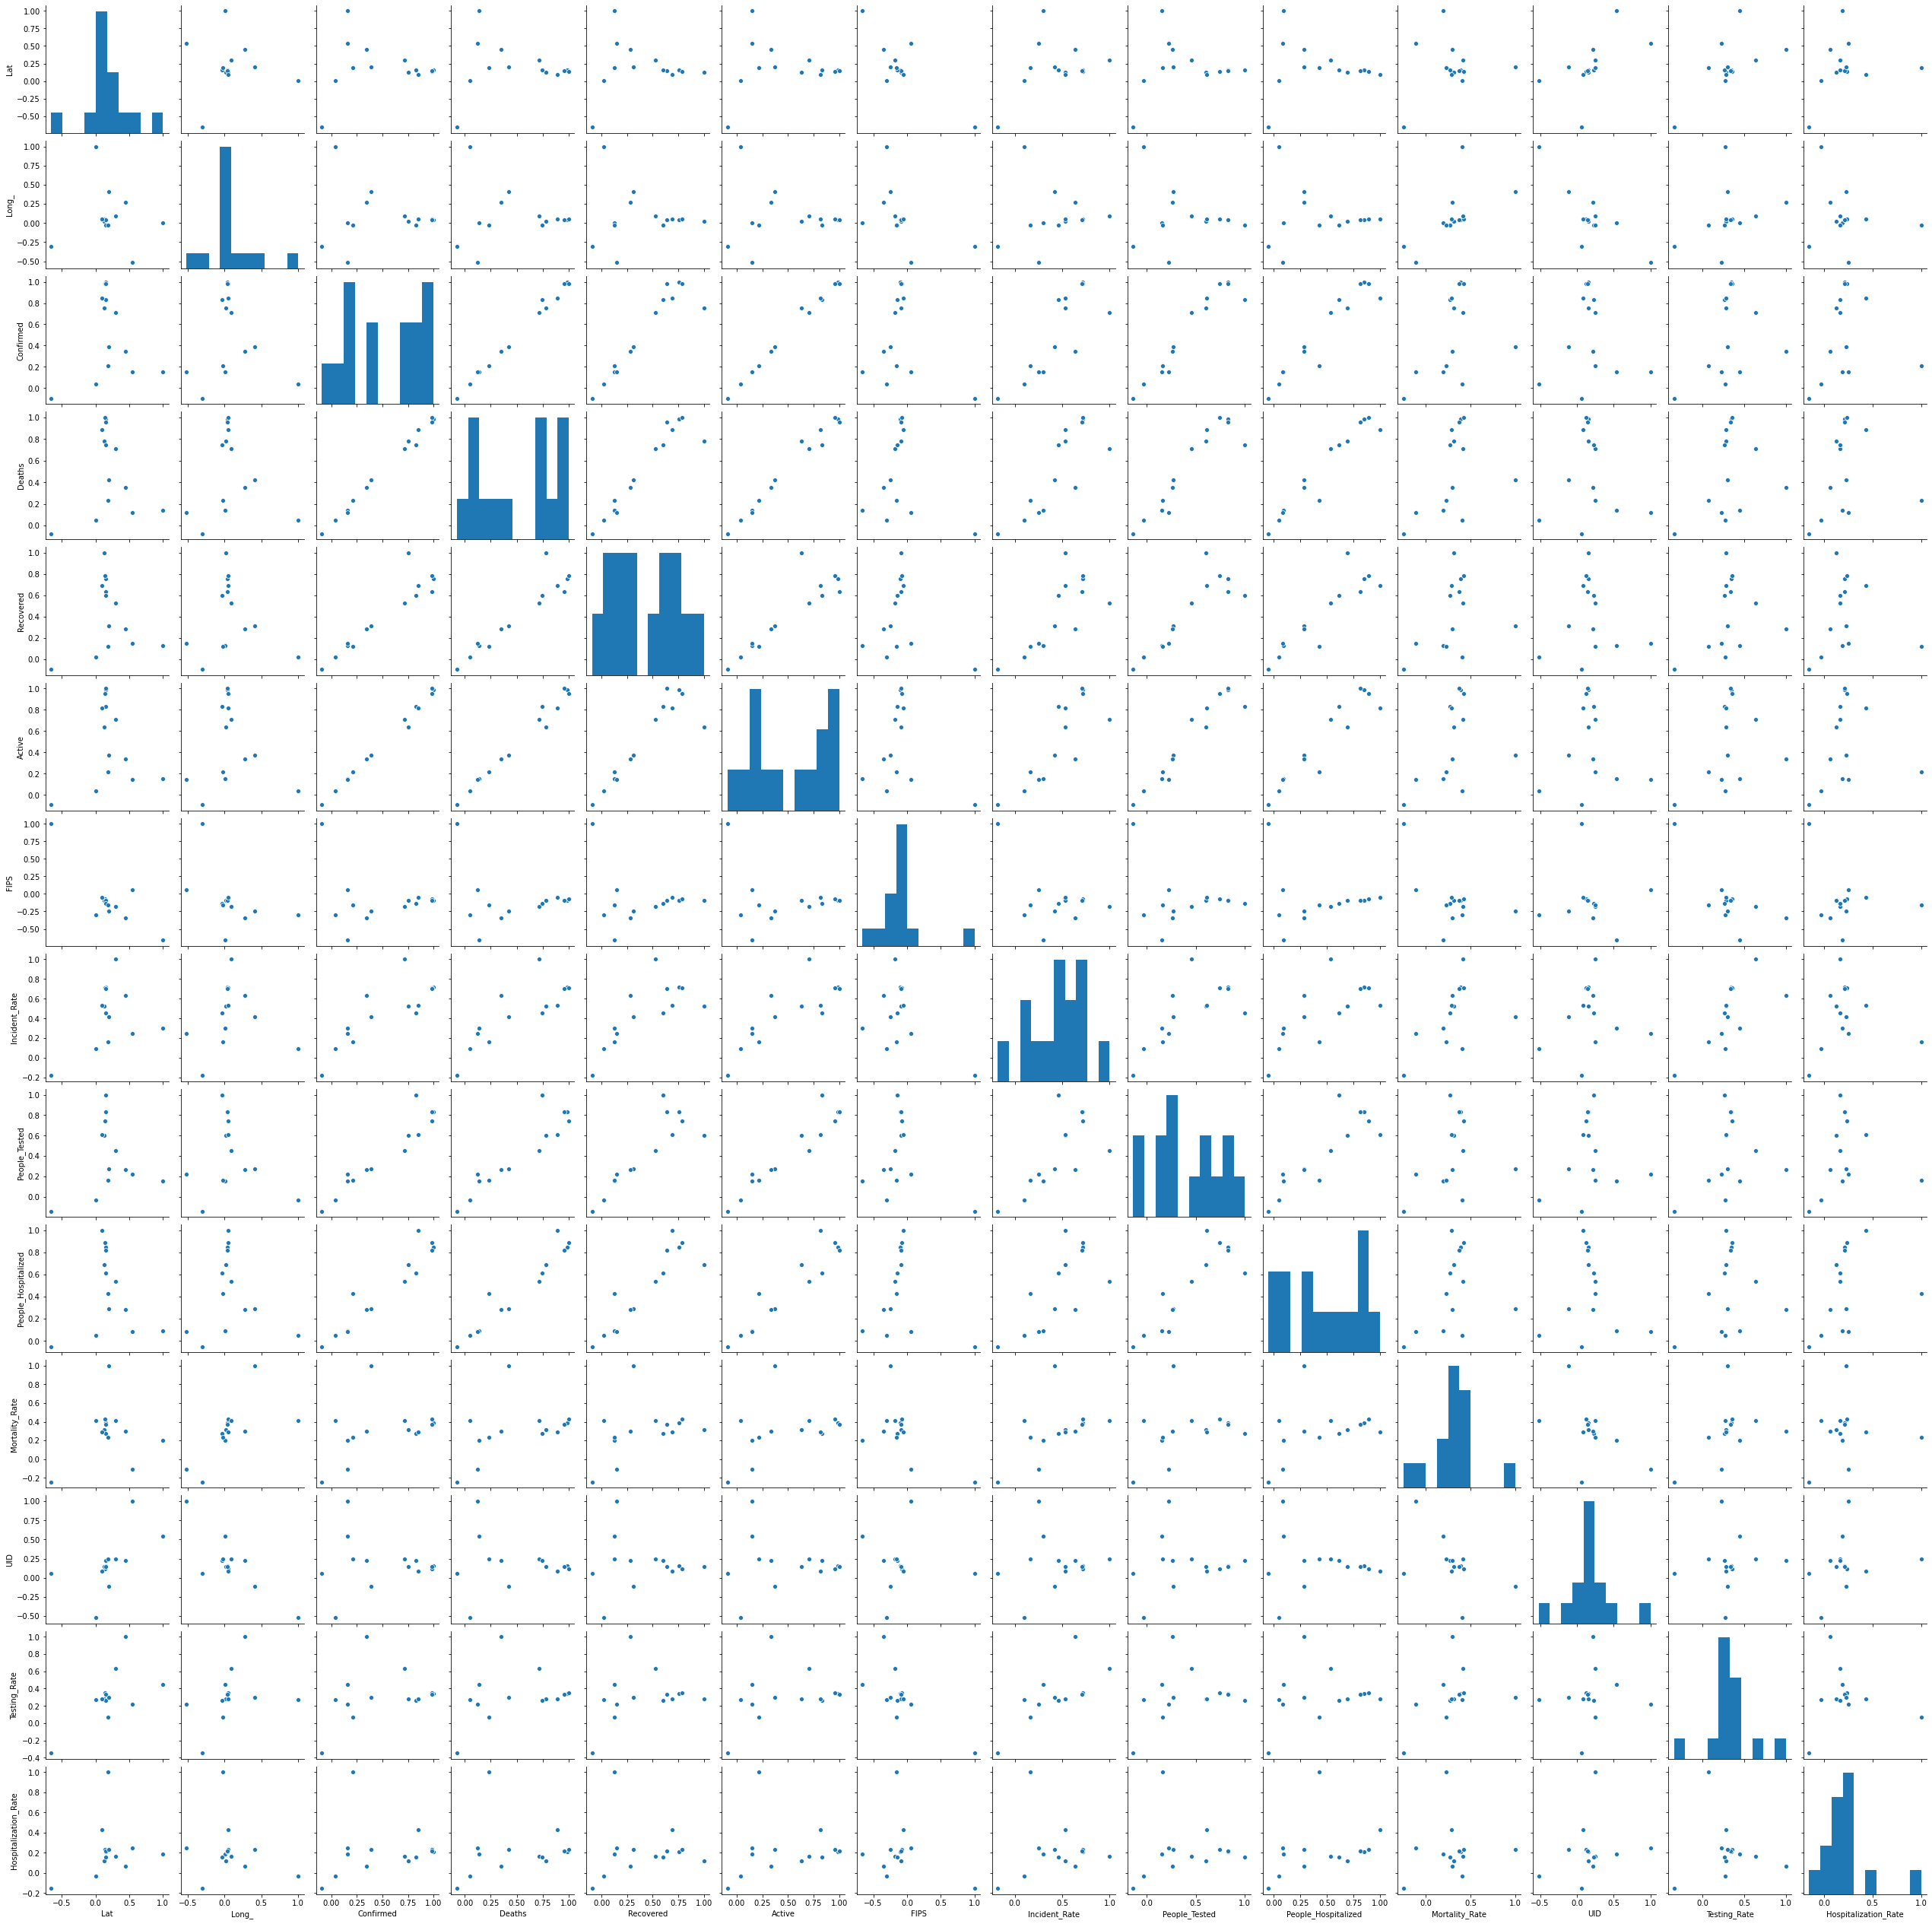

In [14]:
#plt.figure(figsize=(5,5))
sn.pairplot(df)
plt.show()

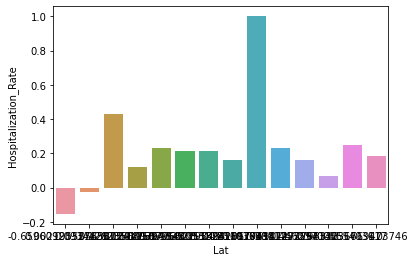

In [15]:
sn.barplot(y='Hospitalization_Rate',x='Lat',data=df)
plt.show()

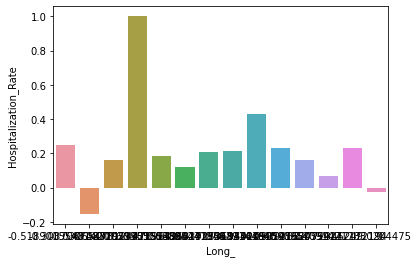

In [16]:
sn.barplot(y='Hospitalization_Rate',x='Long_',data=df)
plt.show()

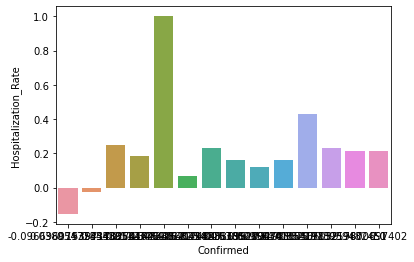

In [17]:
sn.barplot(y='Hospitalization_Rate',x='Confirmed',data=df)
plt.show()

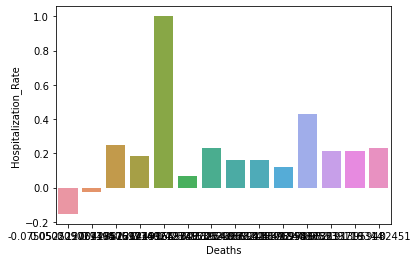

In [18]:
sn.barplot(y='Hospitalization_Rate',x='Deaths',data=df)
plt.show()

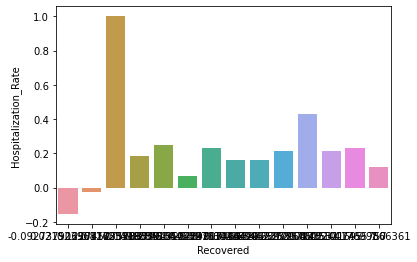

In [19]:
sn.barplot(y='Hospitalization_Rate',x='Recovered',data=df)
plt.show()

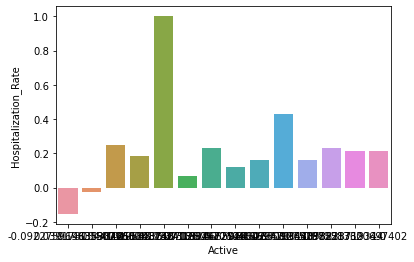

In [20]:
sn.barplot(y='Hospitalization_Rate',x='Active',data=df)
plt.show()

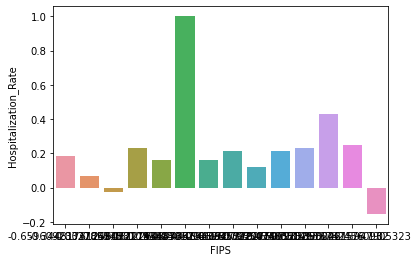

In [21]:
sn.barplot(y='Hospitalization_Rate',x='FIPS',data=df)
plt.show()

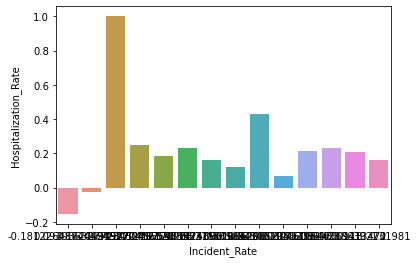

In [22]:
sn.barplot(y='Hospitalization_Rate',x='Incident_Rate',data=df)
plt.show()

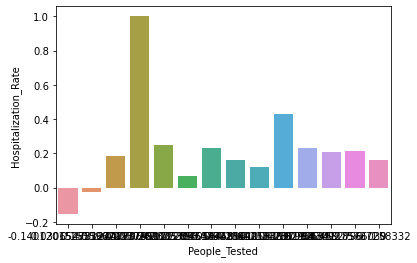

In [23]:
sn.barplot(y='Hospitalization_Rate',x='People_Tested',data=df)
plt.show()

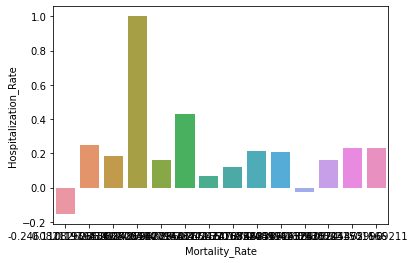

In [24]:
sn.barplot(y='Hospitalization_Rate',x='Mortality_Rate',data=df)
plt.show()

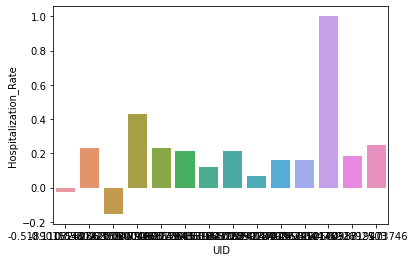

In [25]:
sn.barplot(y='Hospitalization_Rate',x='UID',data=df)
plt.show()

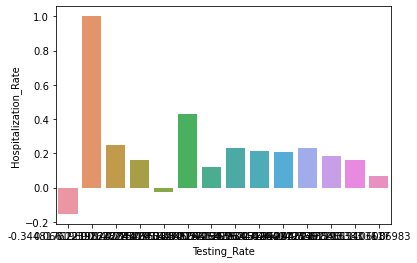

In [26]:
sn.barplot(y='Hospitalization_Rate',x='Testing_Rate',data=df)
plt.show()

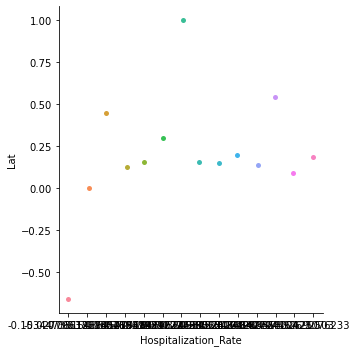

In [31]:
sn.catplot(y="Lat",x="Hospitalization_Rate",height=5,aspect=1,data=df)
plt.show()

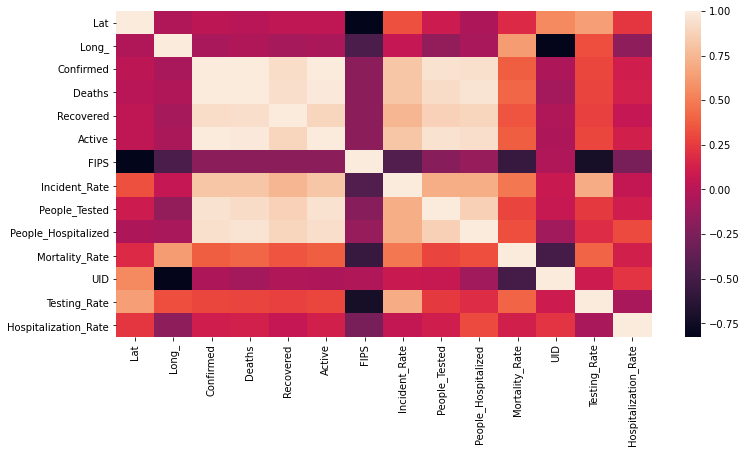

In [32]:
plt.figure(figsize=(12,6))
sn.heatmap(df.corr())
plt.show()

In [33]:
from sklearn.preprocessing import LabelEncoder
for column in df.columns:
    if df[column].dtype==np.number:
        continue
    else:
        df[column]=LabelEncoder().fit_transform(df[column])

In [41]:
df.dtypes

Lat                     float64
Long_                   float64
Confirmed               float64
Deaths                  float64
Recovered               float64
Active                  float64
FIPS                    float64
Incident_Rate           float64
People_Tested           float64
People_Hospitalized     float64
Mortality_Rate          float64
UID                     float64
Testing_Rate            float64
Hospitalization_Rate    float64
dtype: object

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier (n_estimators=10,criterion='entropy',random_state=0)

In [55]:
df_x=df.drop(['Active','Recovered'],axis=1)
y=df['Active']

In [56]:
#Scaling the input variable
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(df_x)
x=pd.DataFrame(x,columns=df_x.columns)

In [57]:
#Breaking our input and target variable into train test data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=10,random_state=42)

In [58]:
print(x_train.shape,'\t',x_test.shape)

(4, 12) 	 (10, 12)


In [59]:
print(y_train.shape,'\t',y_test.shape)

(4,) 	 (10,)


In [60]:
#Importing our Modelslibrary
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

In [61]:
#importing Error Merics
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [62]:
#using algorithms via for loop
model=[LinearRegression(), DecisionTreeRegressor(),KNeighborsRegressor(),SVR(),Lasso(),Ridge(),ElasticNet()]
for m in model:
    m.fit(x_train,y_train)
    print('Score of',m,'is',m.score(x_train,y_train))
    predm=m.predict(x_test)
    print('Error:')
    print('Mean absolute error:',mean_absolute_error(y_test,predm))
    print('Mean squared error:',mean_squared_error(y_test,predm))
    print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,predm)))
    print("r2_score",r2_score(y_test,predm))
    print('*******************************************************************************')
    print('\n')

Score of LinearRegression() is 1.0
Error:
Mean absolute error: 0.08421442282938449
Mean squared error: 0.010692284859412435
Root Mean Squared Error: 0.10340350506347662
r2_score 0.9164172532166646
*******************************************************************************


Score of DecisionTreeRegressor() is 1.0
Error:
Mean absolute error: 0.11557524613121688
Mean squared error: 0.017873509492930505
Root Mean Squared Error: 0.13369184527461092
r2_score 0.8602808438308622
*******************************************************************************




ValueError: Expected n_neighbors <= n_samples,  but n_samples = 4, n_neighbors = 5

In [63]:
#cross validatethe models
from sklearn.model_selection import cross_val_score
model=[LinearRegression(), DecisionTreeRegressor(),KNeighborsRegressor(),SVR(),Lasso(),Ridge(),ElasticNet()]
for m in model:
    score=cross_val_score(m,x,y,cv=4,scoring='r2')
    print('score of',m,'is:')
    print("score:",score)
    print('Mean Score:',score.mean())
    print("Standard deviation:",score.std())
    print("************************************")
    print('\n')

score of LinearRegression() is:
score: [  0.5557742    0.94216616 -66.49213691  -3.74709849]
Mean Score: -17.18532375998386
Standard deviation: 28.526742580366076
************************************


score of DecisionTreeRegressor() is:
score: [  0.95154674   0.80084233   0.56745392 -17.71193955]
Mean Score: -3.848024139963681
Standard deviation: 8.005504935668574
************************************


score of KNeighborsRegressor() is:
score: [  0.61656847   0.62115223   0.79194064 -20.95520053]
Mean Score: -4.731384799092895
Standard deviation: 9.367091032602447
************************************


score of SVR() is:
score: [ 0.81519658  0.60861568  0.94999784 -0.94101451]
Mean Score: 0.35819889632741114
Standard deviation: 0.75989093076028
************************************


score of Lasso() is:
score: [-6.76795771e-03 -3.73663215e-02 -9.87683991e-01 -2.04928069e+01]
Mean Score: -5.381156283268377
Standard deviation: 8.733623575902374
************************************


sc

In [64]:
#Ridge model is giving best result so finding its best parameter using GridSearchCV
from sklearn.model_selection import GridSearchCV
ridge=Ridge()
parameters={'alpha':[0.001,0.01,1],'random_state':range(42,100)}
clf=GridSearchCV(ridge,parameters)
clf.fit(x,y)
clf.best_params_

{'alpha': 1, 'random_state': 42}

In [65]:
#Using Ridge model with best results
ridge=Ridge(alpha=1,random_state=42)
ridge.fit(x_train,y_train)
print('Score:',ridge.score(x_train,y_train))
predrd=ridge.predict(x_test)
print('\n')
print('mean absolute error:',mean_absolute_error(y_test,predrd))
print('mean squared error:',mean_squared_error(y_test,predrd))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,predrd)))
print('\n')
print("r2_score:",r2_score(y_test,predrd))

Score: 0.9956583420853021


mean absolute error: 0.1066358652307295
mean squared error: 0.015088275511829893
Root Mean Squared Error: 0.12283434174460289


r2_score: 0.8820533189973597


In [66]:
#cross validate Ridge
Score=cross_val_score(ridge,x,y,cv=4,scoring='r2')
print("Score:",score)
print('Mean Score:',score.mean())
print("Standard deviation:",score.std())

Score: [-6.76795771e-03 -3.73663215e-02 -9.87683991e-01 -2.04928069e+01]
Mean Score: -5.381156283268377
Standard deviation: 8.733623575902374


In [67]:
#using AdaBoost
from sklearn.ensemble import AdaBoostRegressor
lasso=Lasso()
adb=AdaBoostRegressor(base_estimator=lasso,n_estimators=20,random_state=59)
adb.fit(x_train,y_train)
print('score:',adb.score(x_train,y_train))
predadb=adb.predict(x_test)
print('\n')
print('mean absolute error:',mean_absolute_error(y_test,predadb))
print('mean squared error:',mean_squared_error(y_test,predadb))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,predadb)))
print('\n')
print("r2_score:",r2_score(y_test,predadb))

score: -0.2589553284893322


mean absolute error: 0.34786187152949266
mean squared error: 0.18076181277380224
Root Mean Squared Error: 0.4251609257373051


r2_score: -0.4130346342081701


In [68]:
#cross validate AdaBoostRegressor
score=cross_val_score(adb,x,y,cv=4,scoring='r2')
print("Score:",score)
print('Mean Score:',Score.mean())
print("Standard deviation:",score.std())

Score: [-5.51143100e-03 -2.04902963e-01 -4.68305354e-01 -3.09673927e+01]
Mean Score: 0.8414086705103013
Standard deviation: 13.312321619546653


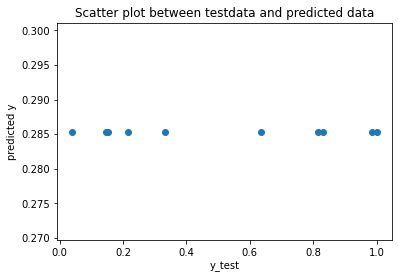

In [69]:
#Plotting scatter plot between test data and predicted data for Ada Boost
plt.scatter(y_test,predadb)
plt.xlabel('y_test')
plt.ylabel('predicted y')
plt.title("Scatter plot between testdata and predicted data")
plt.show()